# Fake News Classifier Project

The purpose of this project is to train a classifer model to be able to accurately detect news articles that are fake.

## Import Libraries

In [1]:
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Preprocessing

In [3]:
#Drop unnecessary column
df = df.drop(columns = "Unnamed: 0")

In [4]:
#Examine the dataframe
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [5]:
#Examine duplicates
df.duplicated().sum()

29

In [6]:
df[df.duplicated()].head(3)

,title,text,label
1492,"University of Missouri, please immediately fir...",To watch the video of photographer Tim Tai get...,REAL
1954,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,REAL
2336,Obamacare Enrollees Anxiously Await Supreme Co...,"“I’ve got my six-month, regular cancer checkup...",REAL


In [7]:
df["text"].duplicated().sum()

275

In [8]:
df["title"].duplicated().sum()

79

In [9]:
#Drop duplicates
df["text"] = df["text"].drop_duplicates()
df["title"] = df["title"].drop_duplicates()
df.describe()

,title,text,label
count,6256,6060,6335
unique,6256,6060,2
top,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",REAL
freq,1,1,3171


In [10]:
#Check for missing values
df.isna().sum()

title     79
text     275
label      0
dtype: int64

In [11]:
#Drop missing values
df = df.dropna()
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
#Check the label distribution
df["label"].value_counts()

FAKE    3026
REAL    2985
Name: label, dtype: int64

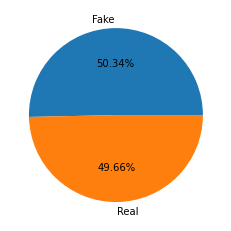

In [13]:
#Visualize the distribution
label_values = df["label"].value_counts()
labels = ["Fake","Real"]
plt.pie(label_values, labels = labels, autopct = "%1.2f%%");

In [14]:
#Create a function to remove stopwords
wpt = nltk.WordPunctTokenizer()
stopwords = nltk.corpus.stopwords.words("english")

def clean_text(text):
    text = re.sub(r"[0-9]"," ",text)
    words = wpt.tokenize(text)
    filtered_words = [word for word in words if word not in stopwords]
    text= " ".join(filtered_words)
    return text

In [15]:
#Remove stopwords
df["text"] = df["text"].apply(lambda x: clean_text(x))
df["text"].head(5)

0    Daniel Greenfield , Shillman Journalism Fellow...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U . S . Secretary State John F . Kerry said Mo...
3    — Kaydee King (@ KaydeeKing ) November , The l...
4    It ' primary day New York front - runners Hill...
Name: text, dtype: object

## Modeling

In [16]:
#Split the dataset into train and test
X = df["text"].copy()
y = df["label"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

In [17]:
#Double check the length of variables
len(X_train),len(X_test),len(y_train),len(y_test)

(4027, 1984, 4027, 1984)

In [18]:
#Convert words into features
vectorizer = TfidfVectorizer(max_df = 0.85, min_df = 0.0005)
train_tfidf = vectorizer.fit_transform(X_train)
test_tfidf = vectorizer.transform(X_test)

In [19]:
train_tfidf.shape

(4027, 25606)

In [20]:
tfidf_numbers = train_tfidf.toarray()

In [21]:
words = vectorizer.get_feature_names_out()

In [22]:
words_df = pd.DataFrame(tfidf_numbers, columns = words)
words_df

,aa,aaa,aaron,aarp,abaaoud,aback,abadi,abandon,abandoned,abandoning,...,zoning,zoo,zuckerberg,zuesse,zwick,ædonis,état,œthe,œthey,śâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Multinomial Naive Bayes

In [23]:
#Initialize and train the model
MNB = MultinomialNB()
MNB.fit(train_tfidf, y_train)

MultinomialNB()

In [24]:
#Predict
MNB_prediction = MNB.predict(test_tfidf)

In [25]:
#Display the accuracy
MNB_score = accuracy_score(y_test, MNB_prediction)
print(MNB_score)

0.8780241935483871


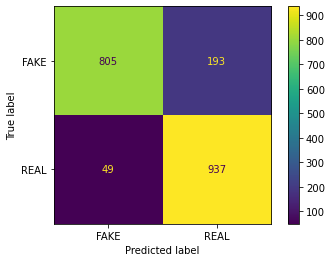

In [26]:
#Visualize the confusion matrix
MNB_cm = confusion_matrix(y_test, MNB_prediction)
ConfusionMatrixDisplay(confusion_matrix = MNB_cm, display_labels = MNB.classes_).plot();

### K Nearest Neighbors

In [27]:
#Initialize and train the model
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
#Predict
KNN_prediction = KNN.predict(test_tfidf)

In [29]:
#Display the accuracy
KNN_score = accuracy_score(y_test, KNN_prediction)
print(KNN_score)

0.860383064516129


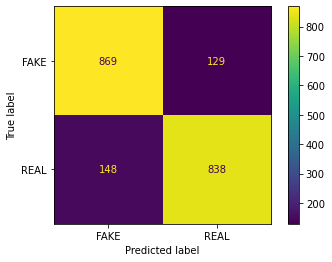

In [30]:
#Visualize the confusion matrix
KNN_cm = confusion_matrix(y_test, KNN_prediction)
ConfusionMatrixDisplay(confusion_matrix = KNN_cm, display_labels = KNN.classes_).plot();

### Random Forest

In [31]:
#Initialize and train the model
RFC = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
RFC.fit(train_tfidf, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [32]:
#Predict
RFC_prediction = RFC.predict(test_tfidf)

In [33]:
#Display the accuracy
RFC_score = accuracy_score(y_test, RFC_prediction)
print(RFC_score)

0.8936491935483871


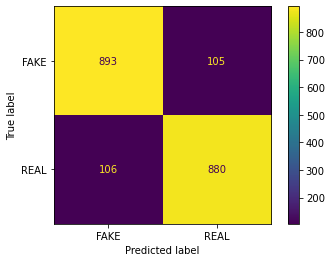

In [34]:
#Visualize the confusion matrix
RFC_cm = confusion_matrix(y_test, RFC_prediction)
ConfusionMatrixDisplay(confusion_matrix = RFC_cm, display_labels = RFC.classes_).plot();

## Final Results

The results reveal that the most accurate model is the random forest model

In [35]:
#Create a dictionary to store model results
results_dictionary = {"Multinomial Naive Bayes" : MNB_score,
                     "K Nearest Neighbors" : KNN_score,
                     "Random Forest" : RFC_score}

In [36]:
#Display the results by converting the dictionary to a dataframe
results_df = pd.DataFrame(results_dictionary.items(), columns = ["Model", "Accuracy Score"])
results_df.sort_values(by = ["Accuracy Score"], ascending = False)

,Model,Accuracy Score
2,Random Forest,0.893649
0,Multinomial Naive Bayes,0.878024
1,K Nearest Neighbors,0.860383
